# Introduction
By combining the basic libraries provided in NumPy etc., you can create your own classes / functions equivalent to the functions implemented in the applied libraries such as scikit-learn. This is called scratch.​


Through scratching, it is difficult to grasp just by moving a library such as scikit-learn, and we aim for a deep understanding of the algorithm. It also improves your coding skills, but that's not the main purpose.

In [1]:
# Predefines and import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# load test data set
data = pd.read_csv('../Data/Normal/houseprice_train.csv')
print(data.shape)
print(data.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [3]:
X = np.array(data.drop(columns = ['SalePrice']))
Y = np.array(data['SalePrice'])
print(X.shape, Y.shape)

(1460, 80) (1460,)


# Problem 1
Train Test Split Scratch

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size = 0.8)
print('Train Shape:', x_train.shape, y_train.shape)
print('Test Shape:', x_test.shape, y_test.shape)

Train Shape: (1168, 80) (1168,)
Test Shape: (292, 80) (292,)


In [5]:

def scratch_train_test_split(X,Y, train_size=0.8):
    if X.shape[0] != Y.shape[0]:
        raise TypeError('X and Y does not have same tupple count!')
    if Y.ndim != 1:
        raise TypeError('Y does not have the correct dimension, should be (n,)')
    n = X.shape[0]
    split_index =int(np.floor(n*train_size))
    x_train = X[:split_index]
    x_test = X[split_index:]
    y_train = Y[:split_index]
    y_test = Y[split_index:]

    return x_train,x_test,y_train,y_test

In [6]:
x_train,x_test,y_train,y_test = scratch_train_test_split(X,Y)
print('Train Shape:', x_train.shape, y_train.shape)
print('Test Shape:', x_test.shape, y_test.shape)


Train Shape: (1168, 80) (1168,)
Test Shape: (292, 80) (292,)


# Problem 2
Creating a code to solve the classification problem

In [7]:
from sklearn.metrics import confusion_matrix
def classification_problem(X, Y, models, test_size = 0.2):
    result = []
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = test_size)
    for model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        result.append((model.__class__.__name__,confusion_matrix(y_test, y_pred)))
    
    return result

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# classification models setup
logistic_reg = SGDClassifier(loss = 'log')
svm_c = SVC()
dec_tree_c = DecisionTreeClassifier()
classification_models = [logistic_reg, svm_c, dec_tree_c]

## Test Iris

In [9]:
from  sklearn.datasets import load_iris
iris_data = load_iris(as_frame = True)
i_x = iris_data.data
i_y = iris_data.target
result = classification_problem(i_x,i_y,classification_models)

for name, conf_matrix in result:
    print('Model: ',name)
    display(conf_matrix)

Model:  SGDClassifier


array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

Model:  SVC


array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

Model:  DecisionTreeClassifier


array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

## Test Simple 1

In [10]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])
result = classification_problem(X,y,classification_models)

for name, conf_matrix in result:
    print('Model: ',name)
    display(conf_matrix)

Model:  SGDClassifier


array([[43,  0],
       [ 0, 57]], dtype=int64)

Model:  SVC


array([[43,  0],
       [ 0, 57]], dtype=int64)

Model:  DecisionTreeClassifier


array([[43,  0],
       [ 0, 57]], dtype=int64)

## Test Simple 2

In [11]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

result = classification_problem(X,y,classification_models)

for name, conf_matrix in result:
    print('Model: ',name)
    display(conf_matrix)

Model:  SGDClassifier


array([[2, 2],
       [1, 3]], dtype=int64)

Model:  SVC


array([[1, 3],
       [1, 3]], dtype=int64)

Model:  DecisionTreeClassifier


array([[2, 2],
       [0, 4]], dtype=int64)

# Problem 3
Creating a code to solve the regression problem

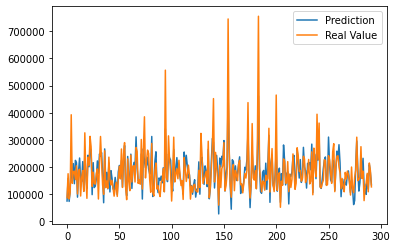

Model:  SGDRegressor RMSE:  47624.093406706845


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
def regression_problem(X, Y, model , test_size = 0.2):
    random_state=11
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = test_size, random_state = random_state)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    result = (model.__class__.__name__,mean_squared_error(y_test, y_pred, squared = False))
    
#     print('pred',y_pred,'real',y_test)
    index = np.arange(y_pred.shape[0])
    plt.plot(index,y_pred, label = 'Prediction')
    plt.plot(index,y_test, label = 'Real Value')
    plt.legend()
    plt.show()
    
    return result

from sklearn.preprocessing import StandardScaler
house_data = pd.read_csv('../Data/Normal/houseprice_train.csv')
hou_x = StandardScaler().fit_transform(house_data[['GrLivArea','YearBuilt']])
hou_y = house_data['SalePrice']
model =  SGDRegressor()
result = regression_problem(hou_x,hou_y,model)
print('Model: ', result[0], 'RMSE: ', result[1])